In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [7]:
data = pd.read_csv("~/catkin_ws/src/Turtlebot3_Pheromone/src/results/visualisation/exp3/20210417-005931/pose_4.csv")

In [8]:
print(data)
num = 4
new_data = [None]*num
for i in range(num):
    new_data[i] = data[data["ID"] == i]
    new_data[i] = new_data[i][["time","ID", "x", "y"]]


     time  ID         x  x_idx         y  y_idx       yaw
0     0.0   0  2.022527     80  1.469454     75 -2.513236
1     0.0   1 -2.022534     40 -1.469457     45  0.628267
2     0.0   2 -1.469457     45  2.022535     80 -0.942470
3     0.0   3  1.469461     75 -2.022539     40  2.199118
4     0.1   0  2.011932     80  1.461488     75 -2.490944
5     0.1   1 -2.009624     40 -1.460572     45  0.604083
6     0.1   2 -1.460014     45  2.010026     80 -0.917710
7     0.1   3  1.462344     75 -2.012847     40  2.217415
8     0.2   0  1.976718     80  1.433827     74 -2.452823
9     0.2   1 -1.972034     40 -1.434398     46  0.615013
10    0.2   2 -1.429971     46  1.972132     80 -0.884236
11    0.2   3  1.436228     74 -1.980186     40  2.270215
12    0.3   0  1.917932     79  1.382456     74 -2.389047
13    0.3   1 -1.907588     41 -1.387008     46  0.656830
14    0.3   2 -1.376396     46  1.909840     79 -0.831076
15    0.3   3  1.385614     74 -1.923070     41  2.319933
16    0.4   0 

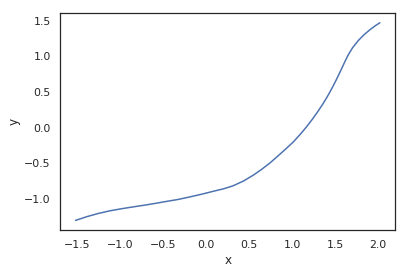

In [9]:
sns.set(style="white")
traj_plot = sns.lineplot(data=new_data[0], x="x", y="y")

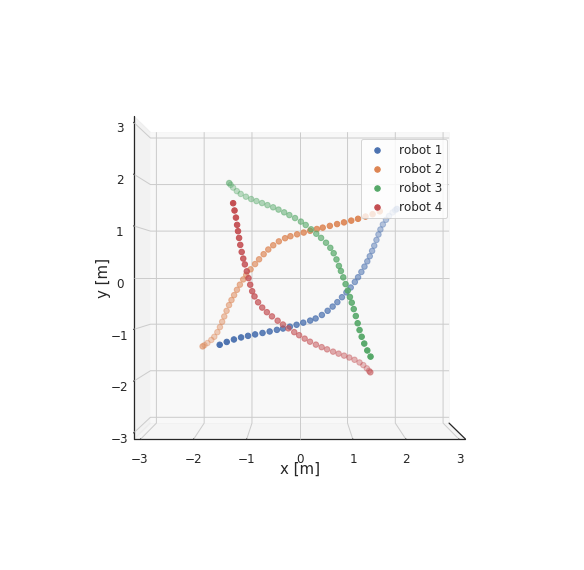

In [10]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')
x = new_data[0]['time']
y = new_data[0]['x']
z = new_data[0]['y']

x2 = new_data[1]['time']
y2 = new_data[1]['x']
z2 = new_data[1]['y']

x3 = new_data[2]['time']
y3 = new_data[2]['x']
z3 = new_data[2]['y']

x4 = new_data[3]['time']
y4 = new_data[3]['x']
z4 = new_data[3]['y']




#ax.set_xlabel("time")
ax.set_ylabel("x [m]", fontsize = 15)
ax.set_zlabel("y [m]", fontsize = 15)

fig.set_figheight(10)
fig.set_figwidth(10)


ax.scatter(x, y, z, label="robot 1", s=30)
ax.scatter(x2, y2, z2, label="robot 2", s=30)
ax.scatter(x3, y3, z3, label="robot 3", s=30)
ax.scatter(x4, y4, z4, label="robot 4", s=30)

ax.set_ylim([-3, 3])
ax.set_zlim([-3, 3])
#ax.set_top_view()
ax.view_init(0,0)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(loc='upper center',bbox_to_anchor=(0.70, 0.780), fontsize=12)

#plt.gca().axes.get_xaxis().set_visible(False)
plt.xticks([])
plt.show()

In [11]:
from math import *
# Calculate the distance of trajectories
x_arr = [None]*num
y_arr = [None]*num
x = [None]*num
y = [None]*num
traj_dist = [0.0]*num
euclidean_dist = [0.0]*num
for i in range(num):
    x_arr[i] = new_data[i]["x"]
    y_arr[i] = new_data[i]["y"]
    x[i] = x_arr[i].to_numpy()
    y[i] = y_arr[i].to_numpy()
#print(x)
#print(y)
#print(len(new_data[0])-1)
for i in range(len(new_data[0])-1):
    for j in range(num):
        #print(x_arr[j])
        traj_dist[j] += sqrt((x[j][i]-x[j][i+1])**2+(y[j][i]-y[j][i+1])**2)
        

for j in range(num):
    #print(x_arr[j])
    euclidean_dist[j] += sqrt((x[j][0]-x[j][-1])**2+(y[j][0]-y[j][-1])**2)
print(traj_dist)
print(euclidean_dist)
print(np.average(np.array(euclidean_dist)/np.array(traj_dist)))

[4.816163587129321, 4.788068226648486, 4.822991852463556, 4.796794758426288]
[4.5016921822558755, 4.491315751600158, 4.538982133380958, 4.42085056085126]
0.9338667087663644
